# Project ProRail 

Door:
* Kai ter Horst 
* Quinn de Groot
* Ama Lee 

In [1]:
# libraries importeren 
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# dataset inlezen 
df = pd.read_csv('sap_storing_data_hu_project.csv', low_memory=False)

In [208]:
df.head()

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_mon_begin_ddt,stm_sap_meldtekst,stm_mon_toelichting_trdl,...,stm_rapportage_maand,stm_rapportage_jaar,stm_x_bron_publ_dt,stm_x_bron_bestandsnaam,stm_x_bron_arch_dt,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,2014,07/05/2014 05:30:12,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,34415,3617016,07/05/2014 05:44:24,0
1,1,50053211,0.0,NaN,02/01/2006 09:00:00,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,NaN,Logboeknr Geeltje : 49 Tijd: 0900,NaN,...,1,2006,02/01/2006 09:00:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704590,13/06/2013 13:37:52,0
2,2,50053213,48.0,GN,02/01/2006 12:35:00,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-P,NaN,...,1,2006,02/01/2006 12:35:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704591,13/06/2013 13:37:52,0
3,3,50053214,72.0,ZL,02/01/2006 16:40:00,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-P,NaN,...,1,2006,02/01/2006 16:40:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704592,13/06/2013 13:37:52,0
4,4,50053215,96.0,ZL,02/01/2006 22:30:00,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-P,NaN,...,1,2006,02/01/2006 22:30:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704593,13/06/2013 13:37:52,0


In [94]:
df[['stm_aanntpl_dd','stm_aanntpl_tijd','stm_fh_ddt']].head()

,stm_aanntpl_dd,stm_aanntpl_tijd,stm_fh_ddt
0,NaN,NaN,NaN
1,NaN,00:00:00,02/01/2006 09:00:00
2,NaN,00:00:00,02/01/2006 13:26:00
3,NaN,00:00:00,02/01/2006 17:20:00
4,NaN,00:00:00,02/01/2006 22:36:00


In [55]:
df[['stm_aanntpl_tijd','stm_fh_ddt']].dtypes

stm_aanntpl_tijd    object
stm_fh_ddt          object
dtype: object

In [65]:
print(df['stm_aanntpl_tijd'].isnull().sum())
print(df['stm_fh_ddt'].isnull().sum())

38
165635


Deze kolommen bevatten 165673 NaN waardes die we  moeten verwijderen.

In [97]:
data = df[['stm_aanntpl_dd','stm_aanntpl_tijd','stm_fh_ddt']].dropna()

In [98]:
data['stm_aanntpl_ddt']  = data['stm_aanntpl_dd']  +" "+ data['stm_aanntpl_tijd'] 

We zien dat dat de tijdstip van functieherstel moet opgeesplitst   worden.Bovendien moeten de kolommen verandert worden naar datetime.

In [101]:
data['stm_aanntpl_ddt']=pd.to_datetime(data['stm_aanntpl_ddt'])#https://stackoverflow.com/questions/37801321/python-pandas-convert-string-to-time-only
data['stm_fh_ddt']=pd.to_datetime(data['stm_fh_ddt'])

In [102]:
data.dtypes

stm_aanntpl_dd              object
stm_aanntpl_tijd            object
stm_fh_ddt          datetime64[ns]
stm_aanntpl_ddt     datetime64[ns]
dtype: object

We moeten nu de verschil van de deze twee  kolommen nemen als onze targett variabel

In [131]:
data['reparatietijd']   = data['stm_fh_ddt'] - data['stm_aanntpl_ddt']

In [206]:
data['reparatietijd'].head()

19177    0.0
19220    0.0
20735    0.0
21228    0.0
22779    1.0
Name: reparatietijd, dtype: float64

In [136]:
#https://stackoverflow.com/questions/17951820/convert-hhmmss-to-minutes-using-python-pandas
data['reparatietijd']= data['reparatietijd'].dt.total_seconds().div(60)

In [147]:
reparatietijd =  data['reparatietijd'].copy()
reparatietijd.describe()

count    6.839850e+05
mean     4.972723e+02
std      2.669839e+04
min     -5.270005e+05
25%      1.000000e+01
50%      3.300000e+01
75%      8.113333e+01
max      4.336560e+06
Name: reparatietijd, dtype: float64

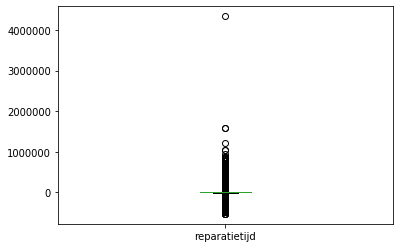

In [148]:
reparatietijd.plot.box()

In [149]:
#Outliers berkenen
reparatietijd= reparatietijd.sort_values() # sorteer de data

# bereken de Q1, Q3 en de IQR 
q1 = reparatietijd.quantile(0.25)
q3 = reparatietijd.quantile(0.75)
qr = q3-q1
print("Q1 = {}, Q3 = {}".format(q1, q3)) 
print("IQR = Q3 - Q1 = {} - {} = {}".format(q1,q3,iqr))

# Bereken het aantal zwakke en sterke outliers boven en onder de boxplot.
zwakke_lower = reparatietijd[(reparatietijd<=q1-1.5*iqr)&(reparatietijd>q1-3*iqr)].count()
sterke_lower = reparatietijd[reparatietijd<q1-3*iqr].count()
zwakke_upper = reparatietijd[(reparatietijd>=q3+1.5*iqr)&(reparatietijd<q3+3*iqr)].count()
sterke_upper = reparatietijd[reparatietijd>q3+3*iqr].count()

print("Lengte van de data : {}".format(len(data)))
print()
print("Aantal sterke outliers boven de boxplot, boven de {} : {}".format(q3+3*iqr, sterke_upper))
print("Aantal zwakke outliers boven de boxplot, tussen {} en {} : {}".format(q3+1.5*iqr,q3+3*iqr, zwakke_upper))
print("Aantal sterke outliers onder de boxplot : {}, tussen de {} en {}".format(q1-1.5*iqr, q1-3*iqr, zwakke_lower))
print("Aantal sterke outliers onder de boxplot : {}, onder de {}".format(q1-3*iqr, sterke_lower))

Q1 = 10.0, Q3 = 81.13333333333334
IQR = Q3 - Q1 = 10.0 - 81.13333333333334 = 3.0
Lengte van de data : 683985

Aantal sterke outliers boven de boxplot, boven de 90.13333333333334 : 152245
Aantal zwakke outliers boven de boxplot, tussen 85.63333333333334 en 90.13333333333334 : 11767
Aantal sterke outliers onder de boxplot : 5.5, tussen de 1.0 en 97368
Aantal sterke outliers onder de boxplot : 1.0, onder de 32988


Uit de Buisness  understanding weten we dat we de storingen moeten voorspellen die de reparatietijd heeft vvan minimaal 15 min tot   maxiimaal 8 uur. We zullen op base van deze range een data selectie maken.

Aan de hand van de boxplot en de bovenstaande berekening, komen er veel outliers voor boven de boxplot. Er is te zien dat de outliers een invloed hebben op de gemiddelde ten opzichte van de mediaan. Deze outlier kan een negatieve invloed hebben op de accuracy van onze voorspellingen.We gaan voor nu de outliers niet verwerken, maar die moet wel gedaan worden voor de complexe modellen.

## Baseline model ontwikkelen

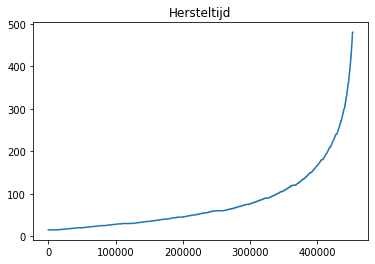

In [193]:
# Onze target variabel plotten in een 
x = range(0,len(reparatietijd))
plt.plot(x,reparatietijd)

plt.title('Hersteltijd')
plt.show()

In [195]:
reparatietijd.describe()

count    452267.000000
mean         79.922844
std          77.042765
min          15.000000
25%          30.000000
50%          53.000000
75%          99.666667
max         480.000000
Name: reparatietijd, dtype: float64

In [196]:
# Bepaal hoeveel boven en onder de gemiddelde van de dataset.
print(len(reparatietijd[reparatietijd < reparatietijd.median()]))
print(len(reparatietijd[reparatietijd > reparatietijd.median()]))

224843
225103


Voor 50% van alle reparatietijd, duren korter/langer dan 120 minuten(2 uren)<br>

We gaan een baseline model bouwen waar onze voorspelde reparatietijd is altijd gelijk aan de mediaan

We willen uiteindelijk de score/kwaliteit van de baseline model bepalen.Hierdoor kunnen we onze toekomstige complexe modellen met onze baseline model vergelijken.   <br>
De kwaliteit van de baseline  modellen worden berekent mbh van de RMSE. Er wordt gekozen om de RMSE te gebruiken,  omdat de RMSE geeft aan de gemiddelde afwijking van de voorspelde waardes. Er kan berekent  worden  hoeveel gemiddeld de mediaan wijkt af van de actuele reparatietijden.

In [150]:
# Baselinne model    maken 
def baselinemodel(data,kolom):
    data['Median']=  data[kolom].median()
    # De kwaliteit/score van de model bepalen mbh van RMSE
    score =np.sqrt(mean_squared_error(data.loc[:,kolom],data.loc[:,'Median']))
    return score

In [151]:
reparatietijd = reparatietijd[(reparatietijd >=15) & (reparatietijd <=480)]
dfbase = reparatietijd.to_frame() # zet om  Series naar dataframe
baselinemodel(dfbase, 'reparatietijd')

81.61135935763781

## Lineair Regression Model 

We hebben gekozen om een Lineair Regression model eerst toe te passen.De reden hiervoor is dat onze target variabel continu waardes bevatten. Bovendien zijn bevatten de meeste features continu waardes of kunen *encoded* worden naar discrete waardes.

We zullen de volgende feature variabelen in onze Linear Regression model.
* **stm_oorz_groep** : *Aan de hand van deze feature, krijgen we en beter definitie van de bepaalde storing. Welke groep de oorzaak een bepaalde storing geven. *
* **stm_oor_code**   : *Zelfde als hierbove. De soort oorzaak van een bepaalde storing geven*
* **stm_prioriteit** : *De ernst van en bepaalde storing geven.* 

### Data Understanding

In deze fase gaan we naar de inhoud kijken van de features variabelen en een betere inzicht te krijgen van onze data.

#### Data Collection 

Er wordt een data selectie gedaan. We gaan onze gekozen feature en target variabelen in onze dataset uithalen en in een niewe dataframe zetten. Verder zullen we naar de attributen van de  nieuwe data bekijken.

In [154]:
# Data selectie maken van de dataset.
df2  = df[['stm_oorz_groep', 'stm_oorz_code', 'stm_prioriteit']].copy()
df2['reparatietijd'] = data['reparatietijd']
df2.head()

,stm_oorz_groep,stm_oorz_code,stm_prioriteit,reparatietijd
0,NaN,NaN,NaN,NaN
1,ONR-RIB,133.0,9.0,NaN
2,ONR-DERD,143.0,9.0,NaN
3,ONR-DERD,142.0,9.0,NaN
4,ONR-DERD,142.0,9.0,NaN


#### Data Describe 

In dit gedeelte gaan we naar de eigenschappen van onze data bekijken.

In [155]:
# Dimensie van de df2 bekijken
df2.shape

(898526, 4)

In [156]:
# datatypes van de dataset bekijken 
df2.dtypes

stm_oorz_groep     object
stm_oorz_code     float64
stm_prioriteit    float64
reparatietijd     float64
dtype: object

**De meetniveaus van onze feature en target variabelen zijn de volgende:**
* **stm_oorz_groep** : Nominale waardes. Deze kolom moeten we *encoden* naar discrrete waardes
* **stm_oor_code**   : Continu waardes.
* **stm_prioriteit** : Continu waardes.
* **reparatietijd**    : Continu waardes.

#### Data Explore

In [157]:
# attributen van df2 bekijken
df2.describe()

,stm_oorz_code,stm_prioriteit,reparatietijd
count,845113.000000,898365.000000,6.839850e+05
mean,193.577248,4.582593,4.972723e+02
std,48.310779,2.262522,2.669839e+04
min,33.000000,1.000000,-5.270005e+05
25%,144.000000,2.000000,1.000000e+01
50%,213.000000,4.000000,3.300000e+01
75%,221.000000,5.000000,8.113333e+01
max,999.000000,9.000000,4.336560e+06


In [158]:
# Aantal ontbrekende waardes bekijken 
df2.isnull().sum()

stm_oorz_groep     53430
stm_oorz_code      53413
stm_prioriteit       161
reparatietijd     214541
dtype: int64

Er is te zien dat we hebben te maken met veel NaN waardes in onze data. <br>
De aantal rijen die we zullen verloren, wordt berekend en weeregeven in percentage.Hierdoor wordt er bepaald of het het verstandig is om al deze NaN waardes te vewijderen.

In [159]:
# bereken aantal rijen die wordt verloren bij Nan waardes
print('Rijen verloren door Nan oorzaakgroep : {}%'.format((df2['stm_oorz_groep'].isnull().sum()/845113)*100))
print('Rijen verloren door Nan oorzaakcode  : {}%'.format((df2['stm_oorz_groep'].isnull().sum()/845113)*100))
print('Rijen verloren door Nan oorzaakcode  : {}%'.format((df2['reparatietijd'].isnull().sum()/845113)*100))
#totaal
print('Totaal aantal rijen verloren : {} %'.format(df2.isnull().sum().sum()/845113*100))

Rijen verloren door Nan oorzaakgroep : 6.322231464904693%
Rijen verloren door Nan oorzaakcode  : 6.322231464904693%
Rijen verloren door Nan oorzaakcode  : 25.38607263170724%
Totaal aantal rijen verloren : 38.047574703027884 %


We verliezen 38% van de data.

We gaan nu  kijken naar elke feature bekijken.

In [160]:
df2['stm_oorz_groep'].unique()

array([nan, 'ONR-RIB', 'ONR-DERD', 'TECHONV', 'WEER'], dtype=object)

In de kolom stm_orz_code gaan we de waarde met de csv bestand Oorzaakcodes verelijken om te zien of er wardes voorkomen die niet gelijk zijn.

In [161]:
df2['stm_oorz_code'][df2['stm_oorz_code'].notnull()].sort_values().unique()

array([ 33.,  48.,  51., 130., 131., 132., 133., 134., 135., 136., 139.,
       140., 141., 142., 143., 144., 145., 146., 147., 148., 149., 150.,
       151., 154., 180., 181., 182., 183., 184., 185., 186., 187., 188.,
       189., 200., 201., 202., 203., 204., 205., 206., 207., 208., 209.,
       210., 211., 212., 213., 214., 215., 218., 219., 220., 221., 222.,
       223., 224., 225., 226., 227., 228., 229., 230., 231., 233., 234.,
       235., 239., 240., 241., 242., 250., 294., 298., 299., 999.])

In [162]:
oorzcodes = pd.read_csv('Oorzaakcodes.csv', delimiter = ';')
oorzcodes['Code'].sort_values().unique()

array([130, 131, 132, 133, 134, 135, 136, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 218, 219, 220, 221, 222, 223,
       224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 239, 240,
       241, 242, 250, 294, 298, 299], dtype=int64)

We zien dat de waardes 33,  48,51 en 999.
Aan de hand van de bovenstaande code kunnnen we concluderen dat de we moeten df2 filteren die de rijen kiezen, waar de oorzaakcode tussen 130 en 299 zit. We zullen eerst zien hoeveel rijen bevatten deze deze oorzaak codes.

In [163]:
len(df2[df2['stm_oorz_code'] == 33])

1

In [164]:
len(df2[df2['stm_oorz_code'] == 48])

1

In [165]:
len(df2[df2['stm_oorz_code'] == 51])

1

In [166]:
len(df2[df2['stm_oorz_code'] == 999])

102

Er zijn in totaal  102  rijen die deze waardes bevatten.We kunnen dus deze rijen uit onze data verwijderen.

In [167]:
df2['stm_prioriteit'].unique()

array([nan,  9.,  5.,  4.,  2.,  1.,  8.])

Er is geen rij/ storing met een prioriteit van 3 en 6 of 7, maar we  kunnen ze misschien wel  voorspellen anagezien dat ze continu waardes zijn in onze Linear Regression model.

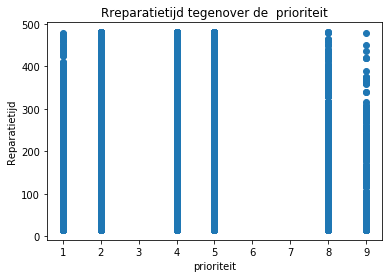

In [205]:
# De hersteltijd teggenover de prioriteit plotten om de versschilte bekijken.
plt.scatter(df2['stm_prioriteit'],df2['reparatietijd'] )
# Titel boven de grafiek:
plt.title('Rreparatietijd tegenover de  prioriteit')
# X-as label
plt.xlabel('prioriteit')
# Y-as label
plt.ylabel('Reparatietijd')
plt.show()

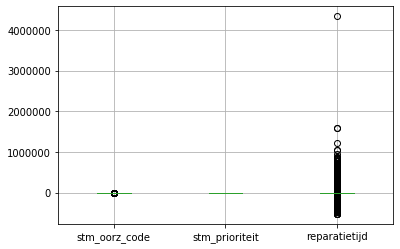

In [170]:
#Outliers visualiseren van de numerieke kolommen adhv boxplot.
df2.boxplot()

Er is te zien dat er veel uitschieters voorkomen in onze target variabelen.Om een duidelijke overzicht te krijgen van hhet aantal  uitschieters inonze data, gaan we de uitschieters per feature  uitrekenen. De aantal uitschieters van onze target variabel is al berekend in onze baseline model,  maar we doen het ook voor de andere variabelen.

Q1 = 144.0, Q3 = 221.0
IQR = Q3 - Q1 = 144.0 - 221.0 = 77.0
Lengte van de data : 898526

Aantal sterke outliers boven de boxplot, boven de 452.0 : 102
Aantal zwakke outliers boven de boxplot, tussen 336.5 en 452.0 : 0


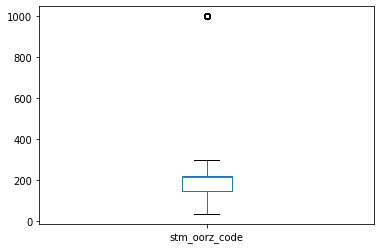

In [172]:
# Uitschieters berekenen van oorzaak code
oorz_code = df2['stm_oorz_code'].sort_values() # sorteer de data

# bereken de Q1, Q3 en de IQR 
q1 = oorz_code.quantile(0.25)
q3 = oorz_code.quantile(0.75)
iqr = q3-q1
print("Q1 = {}, Q3 = {}".format(q1, q3)) 
print("IQR = Q3 - Q1 = {} - {} = {}".format(q1,q3,iqr))

# Bereken het aantal zwakke en sterke outliers boven en onder de boxplot.
zwakke_lower = oorz_code[(oorz_code<=q1-1.5*iqr)&(oorz_code>q1-3*iqr)].count()
sterke_lower = oorz_code[oorz_code<q1-3*iqr].count()
zwakke_upper = oorz_code[(oorz_code>=q3+1.5*iqr)&(oorz_code<q3+3*iqr)].count()
sterke_upper = oorz_code[oorz_code>q3+3*iqr].count()

print("Lengte van de data : {}".format(len(oorz_code)))
print()
print("Aantal sterke outliers boven de boxplot, boven de {} : {}".format(q3+3*iqr, sterke_upper))
print("Aantal zwakke outliers boven de boxplot, tussen {} en {} : {}".format(q3+1.5*iqr,q3+3*iqr, zwakke_upper))

df2['stm_oorz_code'].plot.box()

Er is namelijk 102 sterke outliers te zien die onder de 1000 voorkomt. 
Deze kan de storingen die een code hebben van 999.0. Deze rijen worden verwijdert.

Q1 = 2.0, Q3 = 5.0
IQR = Q3 - Q1 = 2.0 - 5.0 = 3.0
Lengte van de data : 898526

Aantal sterke outliers boven de boxplot, boven de 14.0 : 0
Aantal zwakke outliers boven de boxplot, tussen 9.5 en 14.0 : 0


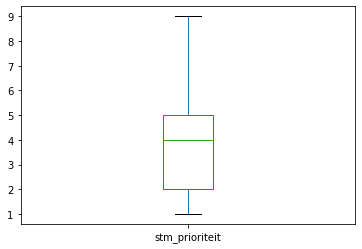

In [173]:
# # Uitschieters berekenen van prioriteit
oorz_code = df2['stm_prioriteit'].sort_values() # sorteer de data

# bereken de Q1, Q3 en de IQR 
q1 = oorz_code.quantile(0.25)
q3 = oorz_code.quantile(0.75)
iqr = q3-q1
print("Q1 = {}, Q3 = {}".format(q1, q3)) 
print("IQR = Q3 - Q1 = {} - {} = {}".format(q1,q3,iqr))

# Bereken het aantal zwakke en sterke outliers boven en onder de boxplot.
zwakke_lower = oorz_code[(oorz_code<=q1-1.5*iqr)&(oorz_code>q1-3*iqr)].count()
sterke_lower = oorz_code[oorz_code<q1-3*iqr].count()
zwakke_upper = oorz_code[(oorz_code>=q3+1.5*iqr)&(oorz_code<q3+3*iqr)].count()
sterke_upper = oorz_code[oorz_code>q3+3*iqr].count()

print("Lengte van de data : {}".format(len(oorz_code)))
print()
print("Aantal sterke outliers boven de boxplot, boven de {} : {}".format(q3+3*iqr, sterke_upper))
print("Aantal zwakke outliers boven de boxplot, tussen {} en {} : {}".format(q3+1.5*iqr,q3+3*iqr, zwakke_upper))

df2['stm_prioriteit'].plot.box() 
# Uit de boxplot is er geen sprake van uitschieters en de kolom lijkt wel te kloppen.

Er  komen geen outliers voor in deze feature. Deze feature hoeven we niet te behandelen.

Bij de reparatietijd, gaan we een selectie van data nemen. Met behulp van de product owners, weten we dat we maximaal een storing met een reparatietijd van 8 uren moet voorspellen.

Wij kiezen voor een indergrens van 15 minuten. We gaan er  vanuit dat er geen drastische acties worden genomen als de oplossing van een storing korter dan 15minuten duurt.Voor deze storingen gaan wij er vanuit dat de dienstregeling niet aangepast hoeft te worden.

### Data Preparation 

In deze fase gaan we de data opschonen.

In [174]:
# Alle Nan waardes verwijderen
df2 = df2.dropna()
df2 = df2[(df2['stm_oorz_code'].isin([33, 48,51, 999]))== False] # de rijen verwijderen waar oorzaak groep is gelijk aan 33, 48, 51 en 999

We gaan de feature stm_oorz_groep encoden naar numerieke waardes met behulp van get_dummies().

In [ ]:
df2  = pd.get_dummies(df2, columns=["stm_oorz_groep"])
df2

Als laatst gaan we een data selectie uitvoeren op de df2 waar de reparatietijd tussen 15 inuten en 8 uren zit.

In [176]:
# Data selectie is een range is van 15 en 480.
df2 = df2[(df2['reparatietijd'] >= 15) & (df2['reparatietijd'] <=  480)]

In [177]:
# nieuwe attributen van de df2 bekijken
df2.describe()

,stm_oorz_code,stm_prioriteit,reparatietijd,stm_oorz_groep_ONR-DERD,stm_oorz_groep_ONR-RIB,stm_oorz_groep_TECHONV,stm_oorz_groep_WEER
count,445793.000000,445793.000000,445793.000000,445793.000000,445793.000000,445793.000000,445793.000000
mean,197.680085,3.763749,79.612349,0.196392,0.102339,0.655134,0.046136
std,41.012273,1.365725,76.743582,0.397269,0.303094,0.475325,0.209779
min,130.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000
25%,151.000000,2.000000,30.000000,0.000000,0.000000,0.000000,0.000000
50%,215.000000,4.000000,53.000000,0.000000,0.000000,1.000000,0.000000
75%,221.000000,5.000000,99.000000,0.000000,0.000000,1.000000,0.000000
max,299.000000,9.000000,480.000000,1.000000,1.000000,1.000000,1.000000


## Nieuw Baseline Model 

Er zal een nieuwe baseline model opesteld worden op base van de opgeschone data en de data selectie die we hadden gedaan.

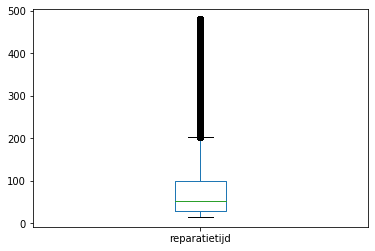

In [178]:
#Nieuwe baseline model maken op bas evan de opgeschone data.
# kopie van de data voor zekerheid
df2_baseline = df2.copy()
df2['reparatietijd'].plot.box()

In [181]:
baselinemodel(df2_baseline, 'reparatietijd')

81.22672708215703

## Linear regression model 

In [183]:
from sklearn.model_selection import train_test_split
# import model
from sklearn.linear_model import LinearRegression

In [198]:
def linearRegression(features, target):
    x_train, x_test, y_train, y_test = train_test_split(features, target) # splitsen in traiining en testing dataset
    # Geeft de dimensie van de opgesplitste datasets
    print(x_train.shape)
    print(y_train.shape)
    print(x_test.shape)
    print(y_test.shape)
    linreg = LinearRegression()
    #fit model 
    linreg.fit(x_train, y_train)
    # Make prediction
    y_pred = linreg.predict(x_test)
    #Evaluate mbh van RMSE
    lrscore = np.sqrt(mse(y_test, y_pred))
    return linreg, lrscore


In [185]:
#Data opsplitsen in features en target variabelen.
features = df2[['stm_oorz_code', 'stm_prioriteit',
       'stm_oorz_groep_ONR-DERD', 'stm_oorz_groep_ONR-RIB',
       'stm_oorz_groep_TECHONV', 'stm_oorz_groep_WEER']]
target = df2['reparatietijd']

In [201]:
lrmodel, lrscore = linearRegression(features, target)
lrscore

(334344, 6)
(334344,)
(111449, 6)
(111449,)


76.03397071191675

In [202]:
# Bereken de afwijking met de baseline model  in percentage
((basescore - lrscore )/ basescore)*100 

28.31053581936852

##### Conclusie:
De score van onze Linear Regressie model is lager dan de score van de baseline model. <br>
Er is een verbetering van relatief 28 %. Dit is best een groot verschil , dus we kunnen zeggen dat deze model  een redelijke model om   toe te paseen.

# Dashboard

In [204]:
#pd.get_dummies(df2, 'ONR-RIB')[['stm_oorz_groep_ONR-DERD', 'stm_oorz_groep_ONR-RIB', 'stm_oorz_groep_TECHONV', 'stm_oorz_groep_WEER']]

In [49]:
print iuhsdf
# This is for your own good

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(iuhsdf)? (<ipython-input-49-06734bec72b8>, line 1)

In [ ]:
from tkinter import *
from tkinter import ttk
from datetime import datetime
import scipy.stats as st
import math


def get_predict(code, groep, prioriteit): #voorspeld de hersteltijd aan de hand van de code, groep en prioriteit
    if groep == 'ONR-DERD':
        result = str(linreg.predict(np.array([code, prioriteit, 1, 0, 0, 0]).reshape(1, -1)))
        result = result.replace('[', '')
        result = result.replace(']', '')
        return float(result)
    elif groep == 'ONR-RIB':
        result = str(linreg.predict(np.array([code, prioriteit, 0, 1, 0, 0]).reshape(1, -1)))
        result = result.replace('[', '')
        result = result.replace(']', '')
        return float(result)
    elif groep == 'TECHONV':
        result = str(linreg.predict(np.array([code, prioriteit, 0, 0, 1, 0]).reshape(1, -1)))
        result = result.replace('[', '')
        result = result.replace(']', '')
        return float(result)
    elif groep == 'WEER':
        result = str(linreg.predict(np.array([code, prioriteit, 0, 0, 0, 1]).reshape(1, -1)))
        result = result.replace('[', '')
        result = result.replace(']', '')
        return float(result)

def get_accuracy(value): #berekend de betrouwbaarheid van de voorspelde tijd met een z-toets
    u = df2['stm_fh_duur'].mean()
    s = df2['stm_fh_duur'].std()
    ox = s / math.sqrt(1)
    z_toets = (value - u) / ox
    p_waarde = st.norm.cdf(z_toets)
    return p_waarde*100

def get_color(percent): #geeft de kleurnaam aan de hand van het percentage
    if 0 < percent < 21:
        return 'red'
    elif 20 < percent < 41:
        return 'orange'
    elif 40 < percent < 61:
        return 'yellow'
    elif 60 < percent < 81:
        return 'OliveDrab1'
    elif 80 < percent < 101:
        return 'green2'
    else:
        return 'blue'
    

def get_input(): # Functie die de invoer van de comboboxen verwerkt en in de treeview zet
    # Waardes uit de comboboxen halen
    code = e1.get()
    groep = e2.get()
    prioriteit = e3.get()
    # check of alle velden zijn ingevult voor dat hij het verwerkt
    if code != "" and groep != "" and prioriteit != "":
        # voorspelt de hersteltijd, berekend de betouwbaarheid en haalt de kleur van de regel op
        prediction = get_predict(int(code), groep, int(prioriteit))
        trust = get_accuracy(prediction)
        color = get_color(trust)
        # voegt alle waardes aan de treeview toe met een tijd van toevoeging
        tree.insert("", END, values=(code, groep, prioriteit, round(prediction, 2), round(trust, 2), datetime.now().strftime("%d-%m-%Y %H:%M")), tags=color)
        
        # reset de comboboxen
        e1.set('')
        e2.set('')
        e3.set('')


def remove(): #Functie die de geselecteerde row uit de treeview verwijderd
    if tree.selection():
        tree.delete(tree.selection())
        
        
def treeview_sort_column(tree, col, reverse): #Functie die rows sort op de column
    # kijkt of de waardes ints zijn of niet, haalt de waardes op en sorteert ze
    # van laag naar hoog of hoog naar laag
    try:
        l = [(int(tree.set(k, col)), k) for k in tree.get_children('')]
    except Exception:
        l = [(tree.set(k, col), k) for k in tree.get_children('')]
    l.sort(reverse=reverse)

    # Zet de waardes terug in de treeview
    for index, (val, k) in enumerate(l):
        tree.move(k, '', index)

    # Zorgt ervoor dat de volgende sort het tegenovergestelde doet
    tree.heading(col, command=lambda _col=col: treeview_sort_column(tree, _col, not reverse))
    

def handle_click(event): #Functie die aanpassen van de column breedte voorkomt
    if tree.identify_region(event.x, event.y) == "separator":
        return "break"
    
    
def deselect(event): # functie die het deselecteren van rows mogelijk maakt
    selection = tree.selection()
    item = tree.identify('item', event.x, event.y)
    if item in selection:
        tree.selection_remove(item)
        return "break"

# initialiseren root, frame en labels
master = Tk()
frame = Frame(master, background='red', borderwidth=4, relief='raised')
Label(frame, text="Oorzaakscode", width=12).grid(row=0)
Label(frame, text="Oorzaaksgroep", width=12).grid(row=1)
Label(frame, text="Prioriteit", width=12).grid(row=2)

#combobox voor de oorzaakscode
e1 = ttk.Combobox(frame,
                  state="readonly",
                  values=[130, 131, 132, 133, 134, 135, 136, 140, 141,
                        142, 143, 144, 145, 146, 147, 148, 149, 150,
                        151, 152, 153, 154, 181, 182, 183, 184, 185,
                        186, 187, 188, 189, 201, 202, 203, 204, 205,
                        206, 207, 208, 209, 210, 211, 212, 213, 214,
                        215, 218, 219, 220, 221, 222, 223, 224, 225,
                        226, 227, 228, 229, 230, 231, 233, 234, 235,
                        239, 240, 241, 242, 250, 294, 298, 299])
#combobox voor de oorzaaksgroep
e2 = ttk.Combobox(frame, state="readonly", values=['ONR-RIB', 'ONR-DERD', 'TECHONV', 'WEER'])
#combobox voor de prioriteit
e3 = ttk.Combobox(frame, state="readonly", values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
#button voor het invoeren van de comboboxen in de treeview
b = Button(frame, width=12, text="print", command=get_input)

#treeview aanmaken
tree = ttk.Treeview(master)

#button voor selectie uit de treeview halen
btn = Button(master, text="delete", command=remove)

#code om lettertype van heading in treeview te vergroten
style = ttk.Style()
style.configure("Treeview.Heading", font=(None, 13))

# columns in treeview aanmaken
tree["columns"] = ["Oorzaakscode", "Oorzaaksgroep", "Prioriteit", "Voorspeltijd (min)", "Trust (%)", "Toevoegdatum"]
tree["show"] = "headings"
tree.heading("Oorzaakscode", text="Oorzaakscode", command=lambda col="Oorzaakscode": treeview_sort_column(tree, col, False))
tree.column("Oorzaakscode", minwidth=0, width=100)
tree.heading("Oorzaaksgroep", text="Oorzaaksgroep", command=lambda col="Oorzaaksgroep": treeview_sort_column(tree, col, False))
tree.column("Oorzaaksgroep", minwidth=0, width=100)
tree.heading("Prioriteit", text="Prioriteit", command=lambda col="Prioriteit": treeview_sort_column(tree, col, False))
tree.column("Prioriteit", minwidth=0, width=100)
tree.heading("Voorspeltijd (min)", text="Voorspeltijd (min)", command=lambda col="Voorspeltijd (min)": treeview_sort_column(tree, col, False))
tree.column("Voorspeltijd (min)", minwidth=0, width=150)
tree.heading("Trust (%)", text="Trust (%)", command=lambda col="Trust (%)": treeview_sort_column(tree, col, False))
tree.column("Trust (%)", minwidth=0, width=100)
tree.heading("Toevoegdatum", text="Toevoegdatum", command=lambda col="Toevoegdatum": treeview_sort_column(tree, col, False))
tree.column("Toevoegdatum", minwidth=0, width=150)

# Tags voor kleuren van rows in treeview
tree.tag_configure('red', background='red')
tree.tag_configure('orange', background='orange')
tree.tag_configure('yellow', background='yellow')
tree.tag_configure('OliveDrab1', background='OliveDrab1')
tree.tag_configure('green2', background='green2')
tree.tag_configure('blue', background='blue')


#code om de functie voor aanpassen van columnbreedte aan de linkermuistoets te koppelen
tree.bind('<Button-1>', handle_click)

#code om de functie voor deselecteren rows aan rechtermuistoets te koppelen
tree.bind("<2>",deselect)

#locaties in grids
frame.grid(row=0, column=0, rowspan=8, columnspan=2, sticky=NSEW)
e1.grid(row=0, column=1, padx=5, pady=5)
e2.grid(row=1, column=1, padx=5, pady=5)
e3.grid(row=2, column=1, padx=5, pady=5)
b.grid(row=3, padx=5, pady=25)
tree.grid(row=0, column=2, rowspan=8, columnspan=2)
btn.grid(row=10, column=3)

#grootte window
master.geometry('1075x300')
master.resizable(False, False)

mainloop()

# Adviesrapport

## Context

### Stakeholders en Doelstellingen van het project.

 <img src="stakeholder_requirements.png" > 

### Beschrijving huidige en gewenste situatie

#### Huidige situatie
<img src="Huidige_situatie.png">
<br>
De huidige situatie ziet er als volgt uit. Het probleem wordt gemeld bij Prorail. Er wordt een initiële indicatie gegeven van hoe lang het naar verwachting gaat duren voordat het probleem is opgelost en dit wordt doorgegeven aan de treinplanners. De reizigers worden ingelicht op basis van deze informatie plus de tijd dat het kost om de dienstregeling te herstarten.
Als de monteur op locatie is, de oorzaak gevonden heeft en tot slot de verwachte, vaak veel te pessimistische, reparatietijd heeft doorgegeven aan de treinplanners. Dan beginnen de voorbereidingen van de planners pas om de dienstregeling daadwerkelijk te herstarten. Het grootste knelpunt hier is de prognose van de aannemer want die is vaak te pessimistisch waardoor de reparatie vaak eerder klaar is dan waar de planners op gerekend hebben. Hierdoor blijft het treinverkeer voor een lange tijd onnodig stil liggen. Een verbeter punt is dus de prognose, deze moet transparant en betrouwbaar zijn. Daarom willen wij een voorspelling van de verwachte reparatietijd toevoegen. Prorail kan dan een voorspelling maken op basis van de prognose en onze engine.



#### Gewenste situatie
<img src="Gewenste_situatie.png">
<br>
De doelstelling die behaald moet worden om bij deze gewenste situatie te komen is het ontwikkelen van een engine die een accurate voorspelling weergeeft en makkelijk te gebruiken is. Op deze manier              kunnen de treinplanners werken met accurate informatie.
De eerste niet-functionele eis is dat de voorspelling objectief moet zijn. Als tweede moet de betrouwbaarheid van de voorspelling berekent worden. De eerste functionele requirement is dat de prognose en de features ingevoerd moeten kunnen worden. Ten tweede is het belangrijk dat er zo min mogelijk clicks zijn. Overzichtelijkheid is erg belangrijk want er is stres tijdens een storing. Daarom is de laatste functionele requirement, houd het simpel.
De gewenste situatie ziet er als volgt uit, het probleem wordt gemeld bij Prorail. Daarna wordt een initiële indicatie gegeven van hoe lang het naar verwachting gaat duren voordat het probleem is opgelost. Deze informatie wordt door gegeven aan de treinplanners. Zij lichten dan de reizigers in op basis van deze informatie en de tijd dat het kost om de dienstregeling te herstarten erbij opgeteld. Als de monteur op locatie is en de oorzaak gevonden heeft kan hij de prognose en extra informatie doorgeven aan Prorail. Tot nu toe (oorzaak code, oorzaak groep en prioriteit). Dit is waar onze ICT-oplossing aan te pas komt en het knelpunt wordt opgelost. Prorail bekijkt dan de prognose en de objectieve voorspelling die de dashboard weergeeft en maakt een gecombineerde voorspelling. De treinplanners krijgen dan een betere voorspelling waardoor ze beginnen met de voorbereidingen.

